<a href="https://colab.research.google.com/github/JessMog/Electric-Car-Usage/blob/main/Electric_Car_Usage_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Overview**


---
We have been tasked to understand electric car usage. We will work as a Data Scientist for the Autolib electric car-sharing service company to investigate a claim about the blue cars from the provided Autolib dataset.


In an effort to do this, we need to identify some areas and periods of interest via sampling stating the reason to the choice of method, then perform hypothesis testing with regards to the claim that we will have made. An example of claim to test would be "Is the number of Bluecars taken in area X different than in area Y? Is it greater in area X than in area Z? Etc”. The selected periods of interest be either weekdays or weekends but not a mix of both. You can also consider postal codes 75015 vs 75017 to some of the areas of interest.



## **Problem Definition**


---



Investigate a claim about the blue cars from the provided Autolib dataset.

## **Datasets used**


*   Variable Definitions: http://bit.ly/DSCoreAutolibDatasetGlossary
*   Dataset: http://bit.ly/DSCoreAutolibDataset



## **Defining the question**


---
Investigate a claim about the blue cars from the provided Autolib dataset,
Identify some areas and periods of interest via sampling stating the reason to the choice of method, then perform hypothesis testing with regards to the claim that we will have made.



### **Defining the metric for success**


---
The objective of this project is to investigate the claim listed above and know whether or not the the average number of blue cars taken is different that of the blue cars returned



# **Data Exploration**

In [1]:
#importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
#Importing the dataset

Autolib = pd.read_csv("http://bit.ly/DSCoreAutolibDataset")

In [3]:
##

Autolib.head(5)

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [4]:

Autolib.tail(5)

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0
16084,95880,6/19/2018,1370,1,weekday,2,2,2,1,0,0,0,0


In [5]:
Autolib.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Postal code             16085 non-null  int64 
 1   date                    16085 non-null  object
 2   n_daily_data_points     16085 non-null  int64 
 3   dayOfWeek               16085 non-null  int64 
 4   day_type                16085 non-null  object
 5   BlueCars_taken_sum      16085 non-null  int64 
 6   BlueCars_returned_sum   16085 non-null  int64 
 7   Utilib_taken_sum        16085 non-null  int64 
 8   Utilib_returned_sum     16085 non-null  int64 
 9   Utilib_14_taken_sum     16085 non-null  int64 
 10  Utilib_14_returned_sum  16085 non-null  int64 
 11  Slots_freed_sum         16085 non-null  int64 
 12  Slots_taken_sum         16085 non-null  int64 
dtypes: int64(11), object(2)
memory usage: 1.6+ MB


In [6]:
Autolib.columns

Index(['Postal code', 'date', 'n_daily_data_points', 'dayOfWeek', 'day_type',
       'BlueCars_taken_sum', 'BlueCars_returned_sum', 'Utilib_taken_sum',
       'Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum',
       'Slots_freed_sum', 'Slots_taken_sum'],
      dtype='object')

In [7]:
# quantiles
Q1 = Autolib.quantile(0.25)
Q3 = Autolib.quantile(0.75)
IQR = Q3 - Q1

# Removing outliers based on the IQR range and stores the result in the data frame 'df_out'
# 

Auto = Autolib[~((Autolib < (Q1 - 1.5 * IQR)) | (Autolib > (Q3 + 1.5 * IQR))).any(axis=1)]

# Printing the shape of our new dataset
# 

print(Auto.shape)

# Printing the shape of our old dataset
#

print(Autolib.shape)

(9783, 13)
(16085, 13)


In [8]:
# Determining the number of records in the dataset

Autolib.shape

(16085, 13)

In [9]:
# Checking for duplicates

Auto.duplicated().any()

False

In [10]:
# Checking for missing values

Auto.isnull().any()

Postal code               False
date                      False
n_daily_data_points       False
dayOfWeek                 False
day_type                  False
BlueCars_taken_sum        False
BlueCars_returned_sum     False
Utilib_taken_sum          False
Utilib_returned_sum       False
Utilib_14_taken_sum       False
Utilib_14_returned_sum    False
Slots_freed_sum           False
Slots_taken_sum           False
dtype: bool

# **Exploratory Analysis**

In [11]:
# Rename columns
c_names = Auto.columns.tolist()
for col in range(len(c_names)):
  c_names[col] = c_names[col].lower().replace(" ", "_")

Auto.columns = c_names

In [12]:
Auto.columns

Index(['postal_code', 'date', 'n_daily_data_points', 'dayofweek', 'day_type',
       'bluecars_taken_sum', 'bluecars_returned_sum', 'utilib_taken_sum',
       'utilib_returned_sum', 'utilib_14_taken_sum', 'utilib_14_returned_sum',
       'slots_freed_sum', 'slots_taken_sum'],
      dtype='object')

In [13]:
Auto.shape

(9783, 13)

In [14]:
Auto.drop(['date', 'n_daily_data_points', 'utilib_taken_sum', 'utilib_returned_sum', 'utilib_14_taken_sum', 'utilib_14_returned_sum', 'slots_freed_sum', 'slots_taken_sum'], axis=1, inplace=True)
Auto

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,postal_code,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum
3899,91330,0,weekday,19,9
3900,91330,1,weekday,10,10
3901,91330,2,weekday,11,13
3903,91330,4,weekday,10,6
3905,91330,6,weekend,28,17
...,...,...,...,...,...
16079,95880,3,weekday,15,13
16080,95880,4,weekday,15,10
16081,95880,5,weekend,19,19
16082,95880,6,weekend,33,35


In [15]:
Auto.sample(5)

,postal_code,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum
5335,92150,6,weekend,151,171
12607,93600,6,weekend,22,20
9673,92700,4,weekday,111,107
10526,93150,6,weekend,8,10
13525,94120,3,weekday,30,27


In [16]:
# Extract day type data

Aut = Auto[Auto.day_type == 'weekend']

In [17]:
Aut.sample(5)

,postal_code,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum
5595,92160,5,weekend,41,42
10633,93170,5,weekend,55,54
13171,94100,6,weekend,11,9
16054,95880,6,weekend,30,21
6121,92210,5,weekend,96,97


In [18]:
Aut.shape

(2963, 5)

# **Univariate Analysis**

In [19]:
Aut['dayofweek'].value_counts(normalize=True)*100

6    52.78434
5    47.21566
Name: dayofweek, dtype: float64

In [20]:
Aut[['bluecars_taken_sum','bluecars_returned_sum']].describe()

,bluecars_taken_sum,bluecars_returned_sum
count,2963.000000,2963.000000
mean,57.718529,57.354708
std,48.991550,49.600634
min,0.000000,0.000000
25%,21.000000,20.000000
50%,43.000000,42.000000
75%,82.000000,82.000000
max,293.000000,301.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of blue cars taken')

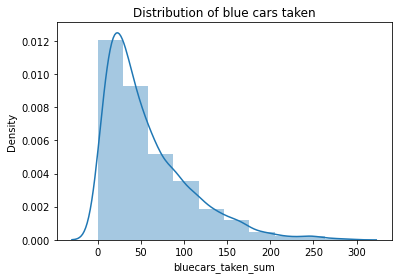

In [21]:
# Bluecars taken

sns.distplot(Aut['bluecars_taken_sum'], bins=10)
plt.title('Distribution of blue cars taken')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'distribution of blue cars returned')

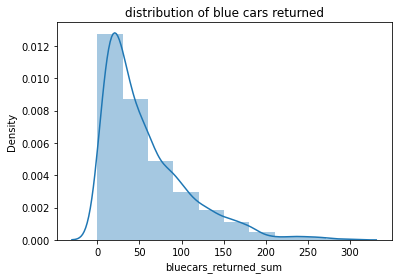

In [22]:
# Bluecars returned 

sns.distplot(Aut['bluecars_returned_sum'], bins=10)
plt.title('distribution of blue cars returned')

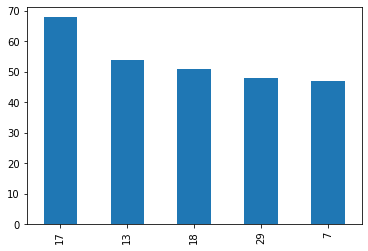

In [23]:
Aut['bluecars_returned_sum'].value_counts().head().plot.bar()

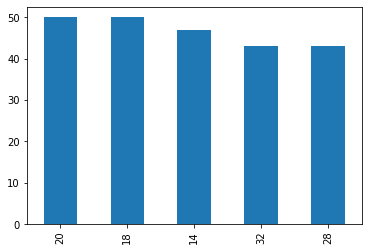

In [24]:
Aut['bluecars_taken_sum'].value_counts().head().plot.bar()

In [25]:
Aut['postal_code'] = Aut['postal_code'].apply(str)
print(Aut.dtypes)

postal_code              object
dayofweek                 int64
day_type                 object
bluecars_taken_sum        int64
bluecars_returned_sum     int64
dtype: object


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [26]:
Aut['dayofweek'] = Aut['dayofweek'].apply(str)
print(Aut.dtypes)

postal_code              object
dayofweek                object
day_type                 object
bluecars_taken_sum        int64
bluecars_returned_sum     int64
dtype: object


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


# **Bivariate Analysis**

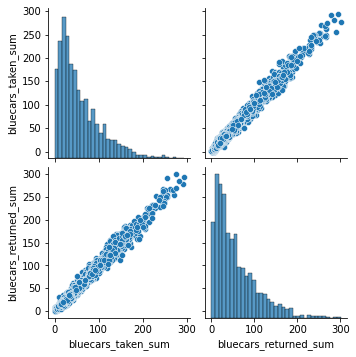

In [27]:
# scatterplot

sns.pairplot(Aut)
plt.show()

Text(0.5, 1.0, 'bluecars_taken vs bluecars_returned_sum')

<Figure size 864x720 with 0 Axes>

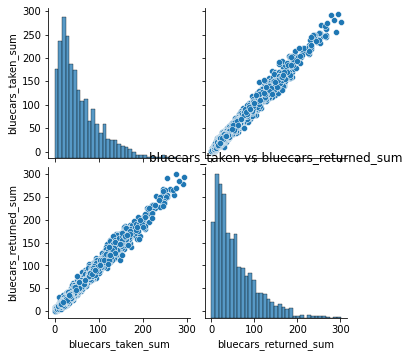

In [28]:
plt.figure(figsize=(12,10))
sns.pairplot(Aut[['bluecars_taken_sum','bluecars_returned_sum']])
plt.title('bluecars_taken vs bluecars_returned_sum')

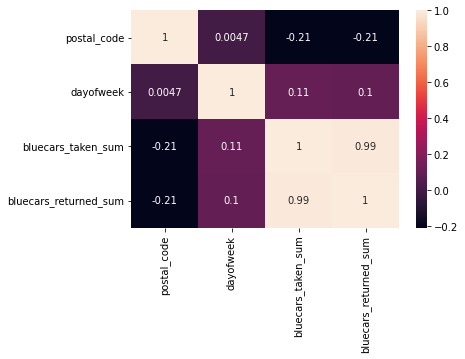

In [29]:
sns.heatmap(Auto.corr(),annot=True)
plt.show()

# **Hypothesis Testing**


In [30]:
Aut.columns

Index(['postal_code', 'dayofweek', 'day_type', 'bluecars_taken_sum',
       'bluecars_returned_sum'],
      dtype='object')

In [31]:
Aut.dtypes

postal_code              object
dayofweek                object
day_type                 object
bluecars_taken_sum        int64
bluecars_returned_sum     int64
dtype: object

In [32]:
Aut.drop(['day_type'], axis=1, inplace=True)
Aut

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,postal_code,dayofweek,bluecars_taken_sum,bluecars_returned_sum
3905,91330,6,28,17
3911,91330,5,24,21
3912,91330,6,27,30
3918,91330,5,16,10
3919,91330,6,18,14
...,...,...,...,...
16068,95880,6,36,33
16074,95880,5,15,15
16075,95880,6,34,32
16081,95880,5,19,19


In [33]:
sns.set(rc={'figure.figsize':(13, 7.5)})
sns.set_context('talk')

In [36]:
Aut.count()

postal_code              2963
dayofweek                2963
bluecars_taken_sum       2963
bluecars_returned_sum    2963
dtype: int64

In [37]:
# Normality test

from scipy.stats import shapiro

def shapiro_test(Aut, col_list):
    for x in col_list:
        print(x)
        data = Aut[x]
        stat, p = shapiro(data)
        print('Statistics=%.3f, p=%.3f' % (stat, p))
        # interpret
        alpha = 0.05
        if p > alpha:
            print('Sample looks Gaussian (fail to reject H0)')
        else:
            print('Sample does not look Gaussian (reject H0)')
        print('\n')

In [38]:
# shapiro Wilk's test

shapiro_test(Aut, list(Aut.columns))

postal_code
Statistics=0.927, p=0.000
Sample does not look Gaussian (reject H0)


dayofweek
Statistics=0.635, p=0.000
Sample does not look Gaussian (reject H0)


bluecars_taken_sum
Statistics=0.869, p=0.000
Sample does not look Gaussian (reject H0)


bluecars_returned_sum
Statistics=0.863, p=0.000
Sample does not look Gaussian (reject H0)




In [39]:
import scipy.stats as stats
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

#Call required libraries
import time  

# To time processes
import warnings     

# To suppress warnings

import numpy as np            

import pandas as pd           
import matplotlib.pyplot as plt              
%matplotlib inline
import seaborn as sns
sns.set()
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
from sklearn.preprocessing import StandardScaler  
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation 
from sklearn.mixture import GaussianMixture 
import os                     
import sys  

In [40]:
# Stratified sample
At = Aut.groupby('dayofweek', group_keys=False).apply(lambda grouped_subset : grouped_subset.sample(frac=0.1))
At

,postal_code,dayofweek,bluecars_taken_sum,bluecars_returned_sum
13290,94110,5,53,43
11673,93360,5,43,45
14715,94340,5,63,55
7511,92310,5,74,67
15969,95880,5,13,15
...,...,...,...,...
13580,94120,6,37,43
5661,92170,6,67,82
4965,92120,6,119,130
13245,94100,6,11,10


In [41]:
# pop mean
mn = Autolib['BlueCars_taken_sum'].mean()
mn

125.92695057506994

In [42]:
d = Autolib['BlueCars_returned_sum'].mean()
d

125.912713708424

In [44]:
# sample mean
x = At['bluecars_taken_sum'].mean()
x

57.41216216216216

In [45]:
y = Aut['bluecars_returned_sum'].mean()
y

57.35470806614917

In [46]:
# sample standard deviation

z = Aut['bluecars_taken_sum'].std()
z

48.99154956409867

In [47]:
# calculating the z-score
zscore = (x-mn) / z
zscore

-1.3985021707318248

In [48]:
#calculating the p value

from scipy.stats import norm
pro = stats.norm.cdf(zscore)
pro

0.08098116063322064

In [49]:
#interpretation of the p value

if pro < 0.05:    
   print(" we are reject the null hypothesis")
else:
  print("we fail to reject null hypothesis")

we fail to reject null hypothesis


In [50]:
Autolib['BlueCars_taken_sum'].mean() - At['bluecars_taken_sum'].mean()

68.51478841290778

In [52]:
import math
sample_mean = At['bluecars_taken_sum'].mean()

z_critical = stats.norm.ppf(q = 0.975)  
print("z-critical value:")              
print(z_critical)                        

pop_stdev = Autolib['BlueCars_taken_sum'].std()
margin_of_error = z_critical * (pop_stdev/math.sqrt(296))

confidence_interval = (sample_mean - margin_of_error,
                       sample_mean + margin_of_error)  

print("Confidence interval:")
print(confidence_interval)

z-critical value:
1.959963984540054
Confidence interval:
(36.28825642281962, 78.53606790150471)


# **Cluster Sampling**

<function matplotlib.pyplot.show>

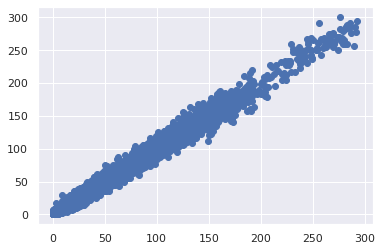

In [53]:
plt.scatter(Auto['bluecars_taken_sum'],Auto['bluecars_returned_sum'])
plt.show

In [58]:
a = Aut.iloc[:, 2:4]
a

,bluecars_taken_sum,bluecars_returned_sum
3905,28,17
3911,24,21
3912,27,30
3918,16,10
3919,18,14
...,...,...
16068,36,33
16074,15,15
16075,34,32
16081,19,19


In [59]:
kmeans = KMeans(2)
kmeans.fit(a)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [61]:
identified_clusters = kmeans.fit_predict(a)
identified_clusters

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [62]:
kmeans.cluster_centers_

array([[ 34.25146727,  33.57336343],
       [127.20989305, 127.77673797]])

In [63]:
kmeans.inertia_

4602326.523205901

In [64]:

Au = Aut.copy()


Au['Cluster'] = identified_clusters
Au

,postal_code,dayofweek,bluecars_taken_sum,bluecars_returned_sum,Cluster
3905,91330,6,28,17,0
3911,91330,5,24,21,0
3912,91330,6,27,30,0
3918,91330,5,16,10,0
3919,91330,6,18,14,0
...,...,...,...,...,...
16068,95880,6,36,33,0
16074,95880,5,15,15,0
16075,95880,6,34,32,0
16081,95880,5,19,19,0


In [65]:
ss = StandardScaler()
ss.fit_transform(Au)

array([[-1.7546114 ,  0.94578078, -0.60670759, -0.81372991, -0.58111747],
       [-1.7546114 , -1.05732747, -0.6883681 , -0.73307217, -0.58111747],
       [-1.7546114 ,  0.94578078, -0.62712271, -0.55159225, -0.58111747],
       ...,
       [ 2.72513968,  0.94578078, -0.48421681, -0.51126338, -0.58111747],
       [ 2.72513968, -1.05732747, -0.79044374, -0.77340104, -0.58111747],
       [ 2.72513968,  0.94578078, -0.50463194, -0.45077007, -0.58111747]])

In [66]:
def doGMM(X, nclust=2):
    model = GaussianMixture(n_components=nclust,init_params='kmeans')
    model.fit(X)
    clust_labels3 = model.predict(X)
    return (clust_labels3)

clust_labels3 = doGMM(Au,2)
gmm = pd.DataFrame(clust_labels3)
Au.insert((Au.shape[1]),'gmm',gmm)

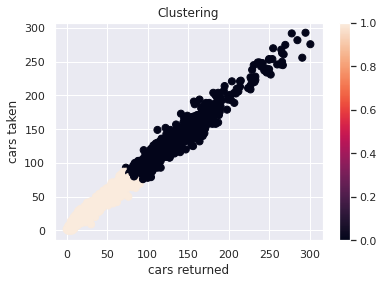

In [67]:

fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(Au['bluecars_returned_sum'],Au['bluecars_taken_sum'],
                     c=gmm[0],s=50)
ax.set_title('Clustering')
ax.set_xlabel('cars returned')
ax.set_ylabel('cars taken')
plt.colorbar(scatter)

In [ ]:
# We fail to reject the null hypothesis